$\textbf{PROGRAMMING ASSIGNMENT - LECTURE 6}$
---

Data: https://archive.ics.uci.edu.

Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.

---
## Dataset: Facebook Live Sellers in Thailand

In [4]:
# imports
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Access Dataset

In [6]:
df = pd.DataFrame(pd.read_csv('Datasets/Live_20210128.csv'))
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


---
### $\textbf{Create a Correlation Heatmap}$

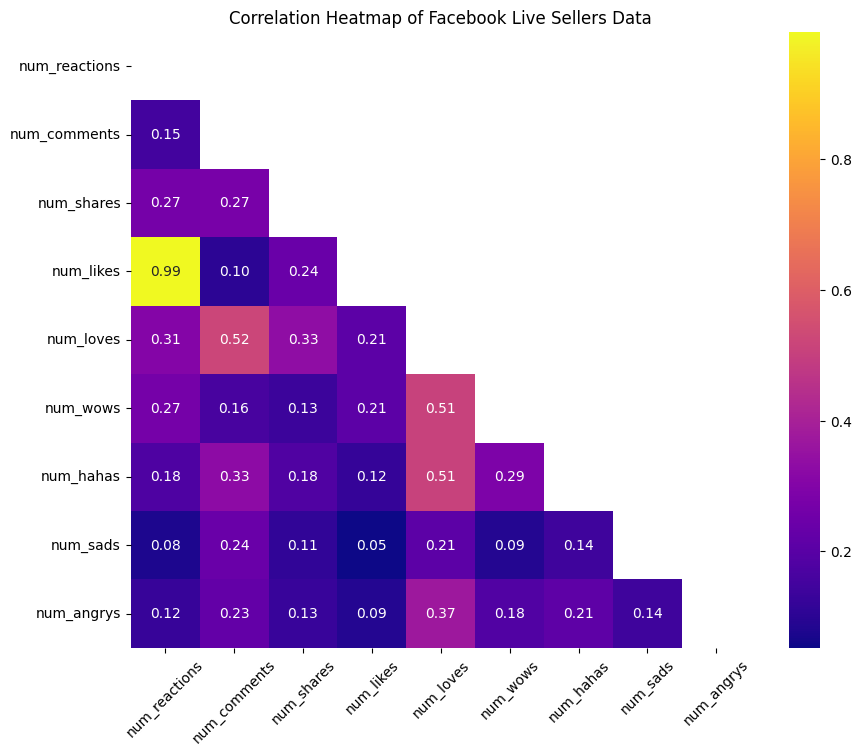

In [12]:
df.columns = ['status_id', 'status_type', 'status_published', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3', 'Column4']
df['num_shares'] = df['num_shares'].apply(lambda x: 0 if x == 0 else 1)
columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
df_corr = df[columns]
corr_matrix = df_corr.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt='.2f', mask=mask)
plt.title('Correlation Heatmap of Facebook Live Sellers Data')
plt.xticks(rotation=45)
plt.show()

### $\textbf{Determine the Top 5 Correlated Frequences with the target/label}$

In [15]:
corr_series = corr_matrix.unstack()
corr_series = corr_series.abs().sort_values(ascending=False)
corr_series = corr_series[corr_series.index.get_level_values(0) != corr_series.index.get_level_values(1)]

top_5_correlations = corr_series.head(10)
top_5_unique = top_5_correlations[::2]

print("Top 5 unique absolute correlations:\n")
print(top_5_unique)

Top 5 unique absolute correlations:

num_likes     num_reactions    0.994923
num_comments  num_loves        0.521223
num_wows      num_loves        0.508798
num_hahas     num_loves        0.507830
num_angrys    num_loves        0.371001
dtype: float64
